# Superstore Analysis

## Otávio Marinho

The purpose of this project is to provide a general analysis of sales and trends for the fictional store, Superstore, using data cleaning and analysis tools in Python, as well as offering insights and recommendations. The data was sourced from [Kaggle](https://kaggle.com).

The original dataset (train.csv) contains 9,800 rows and 18 columns.

[Source](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting)

[License](https://www.gnu.org/licenses/old-licenses/gpl-2.0.en.html)

## **Importing Data and Libraries**

Libraries that were used in the project and a broad vision of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='dark')

sales = pd.read_csv('train.csv')

sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

## Data Cleaning
Columns with an incorrect format were found, some empty values (postal code, which were not used in the analysis and have no statistical value, so they were replaced with zero), and no outliers.

In [2]:
sales['Postal Code'] = sales['Postal Code'].fillna(0)

sales['Order Date'] = pd.to_datetime(sales['Order Date'], format = '%d/%m/%Y')

sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format = '%d/%m/%Y')

print(sales.shape)


(9800, 18)


## Sales by Category

### What are the best-selling product types? From which categories?

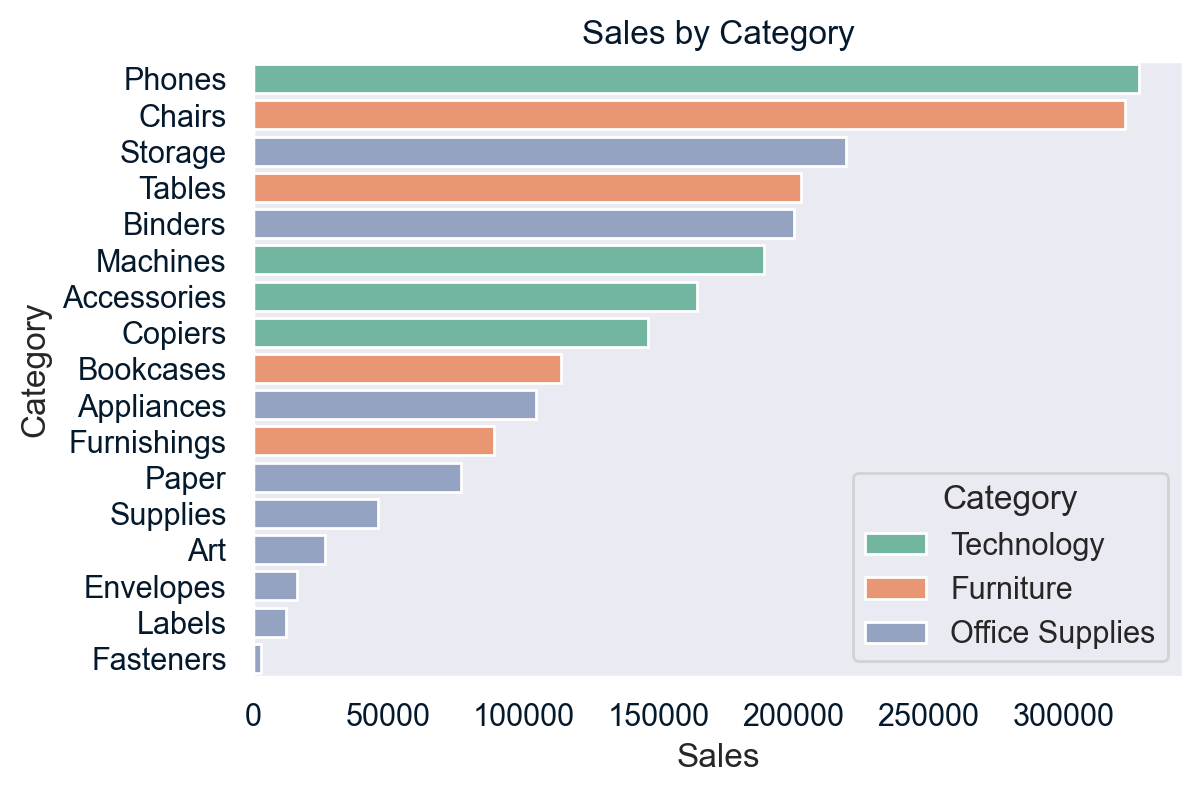

In [3]:
# Sales by Category
plt.figure(figsize=(6,4))
sales_category = sales.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data = sales_category, x = 'Sales', y = 'Sub-Category', hue = 'Category', palette = 'Set2')
plt.title('Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

We can see the most popular products and a small difference between the revenue from the technology and furniture areas when compared to office supplies.

## Which is the most popular product?

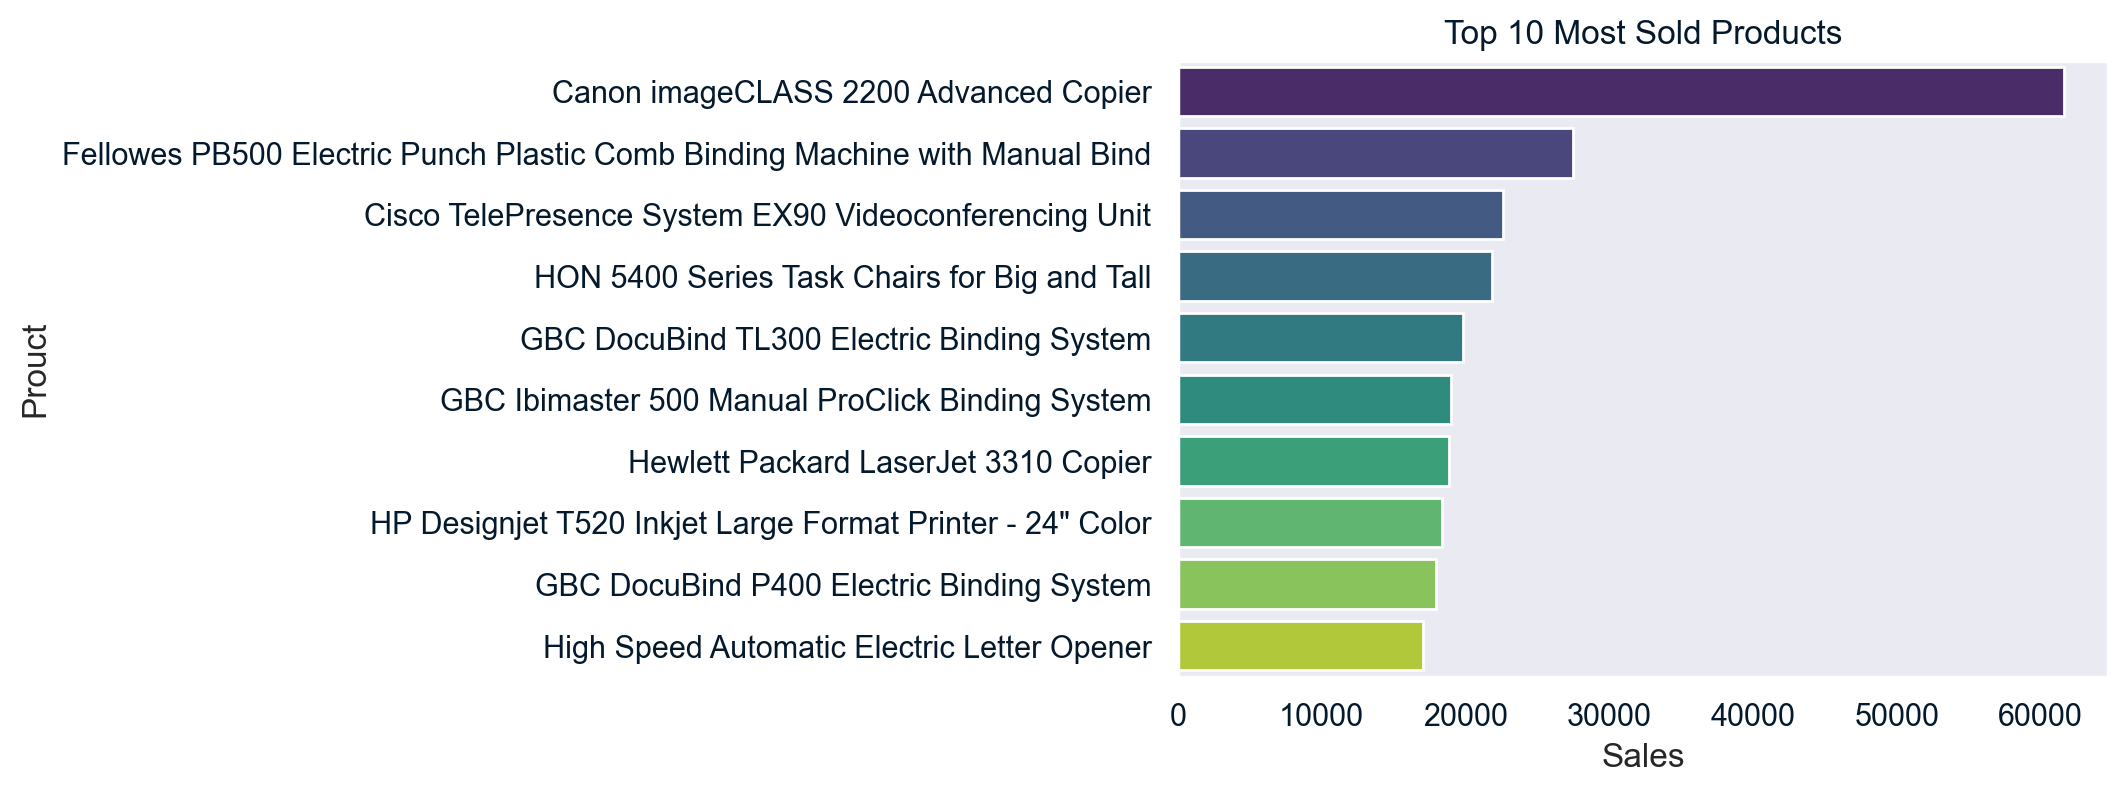

In [4]:
# Top Sold Products
top_products = sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data = top_products, x = 'Sales', y = 'Product Name', palette = 'viridis')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Sales')
plt.ylabel('Prouct')
plt.show()


## Where does the profit comes from?

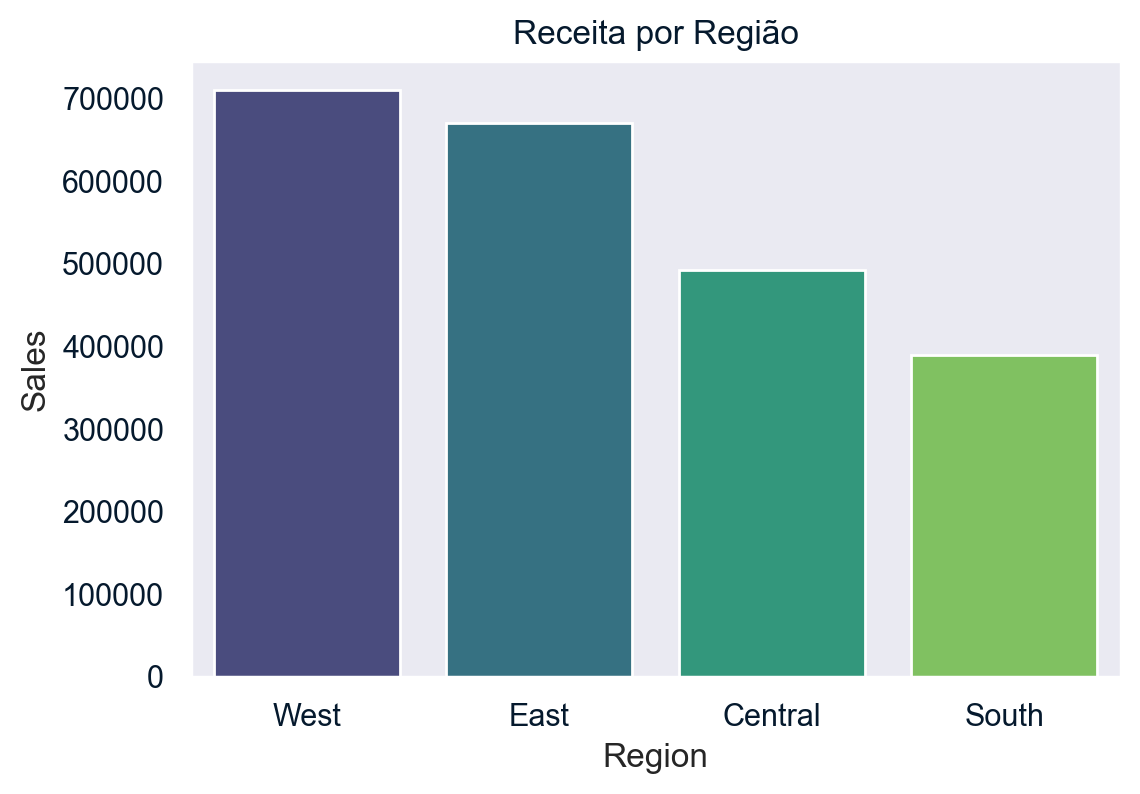

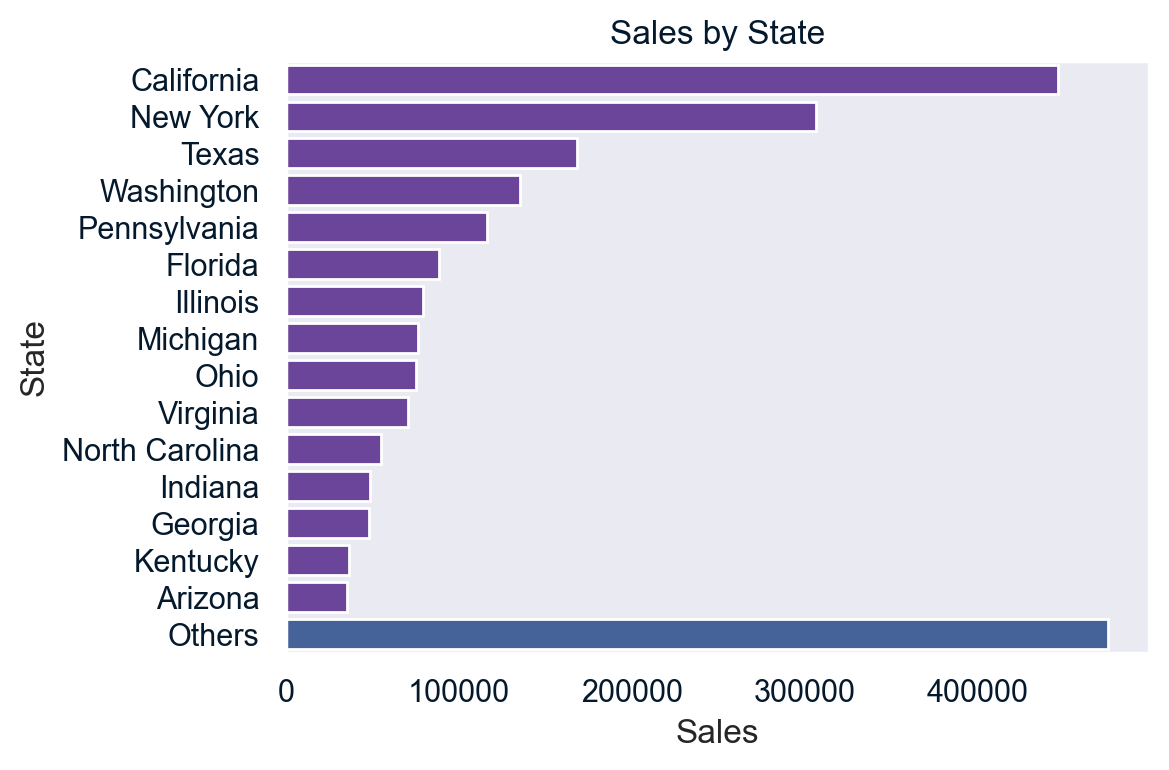

In [5]:
# Sales by Region
plt.figure(figsize=(6,4))
sales_region = sales.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data = sales_region, x = 'Region', y = 'Sales', palette = 'viridis')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

# Sales by State
sales_state = sales.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

# Separating top 15 states and grouping the rest
sales_state_10 = sales_state.iloc[:15]
sales_state_others = sales_state.iloc[15:].sum(numeric_only=True).to_frame().T
sales_state_others['State'] = 'Others'

# Concat top 15 largest with "Others"
sales_state_final = pd.concat([sales_state_10, sales_state_others], ignore_index=True)

sales_state_final['color'] = sales_state_final['State'].apply(lambda x: '#375ea7' if x == 'Others' else '#6a37a7')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=sales_state_final, x='Sales', y='State', palette= sales_state_final['color'].to_list())

# Adjusting Visual
plt.title('Sales by State')
plt.xlabel('Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()


Wealthy states like California and New York have the largest customers, covering almost double the amount of the 35 states combined at the end of the chart.

## What type of shipping do customers prefer?

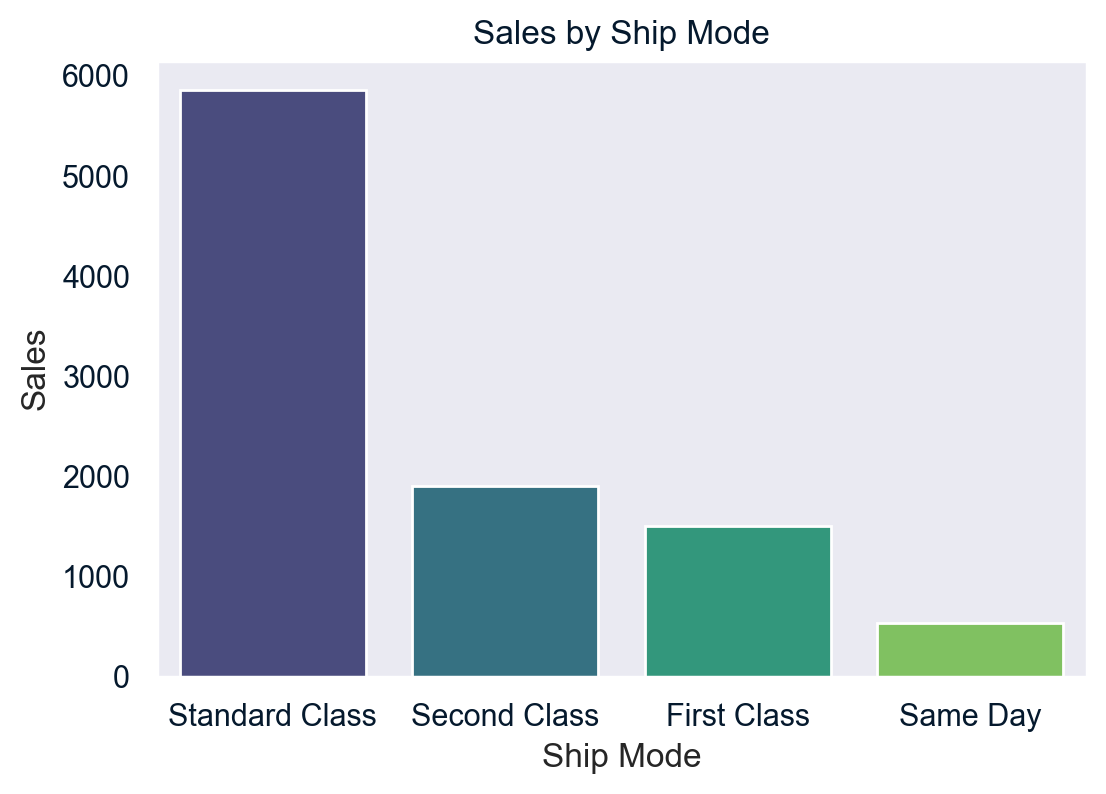

In [6]:
# Sales by Ship Mode
plt.figure(figsize=(6,4))
sales_ship_mode = sales.groupby('Ship Mode')['Row ID'].count().sort_values(ascending=False).reset_index()

ax = sns.barplot(data = sales_ship_mode, x = 'Ship Mode', y = 'Row ID', palette = 'viridis')

plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

The large majority prefers standard shipping.

## Is there a significant difference in delivery times?

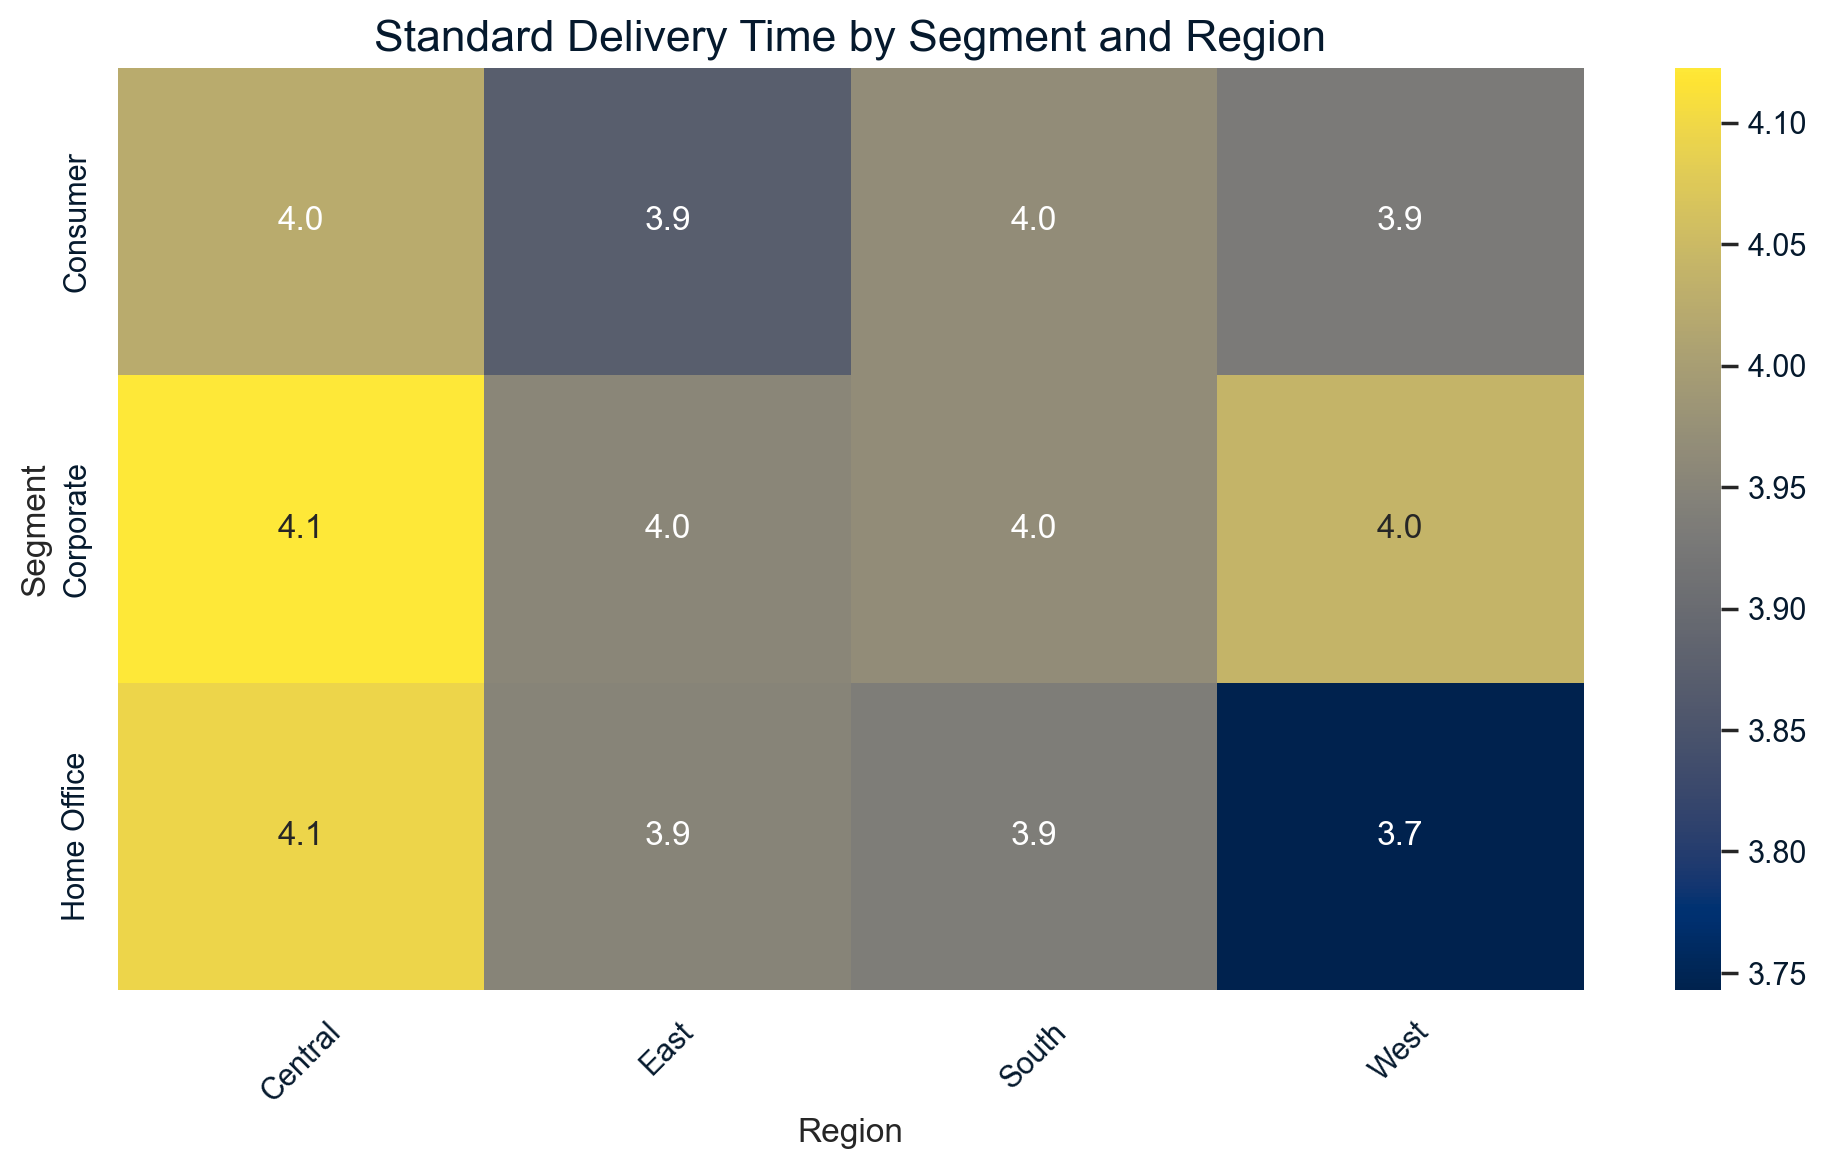

In [7]:
# Mean delivery time
sales['Delivery Time'] = (sales['Ship Date'] - sales['Order Date']).dt.days

# Create DataFrame with grouped data
avg_delivery_time = sales.groupby(['Segment', 'Region'])['Delivery Time'].mean().unstack()

# Create heatmap
plt.figure(figsize=(10, 6)) 
sns.heatmap(avg_delivery_time, annot=True, fmt=".1f", cmap='cividis', cbar=True)

# Personalizar o gráfico
plt.title('Standard Delivery Time by Segment and Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

We don’t see significant differences in wait time between segments and regions, only a few hours of difference.

## How many orders do we have in total per month? During which times of the year does the company stand out?

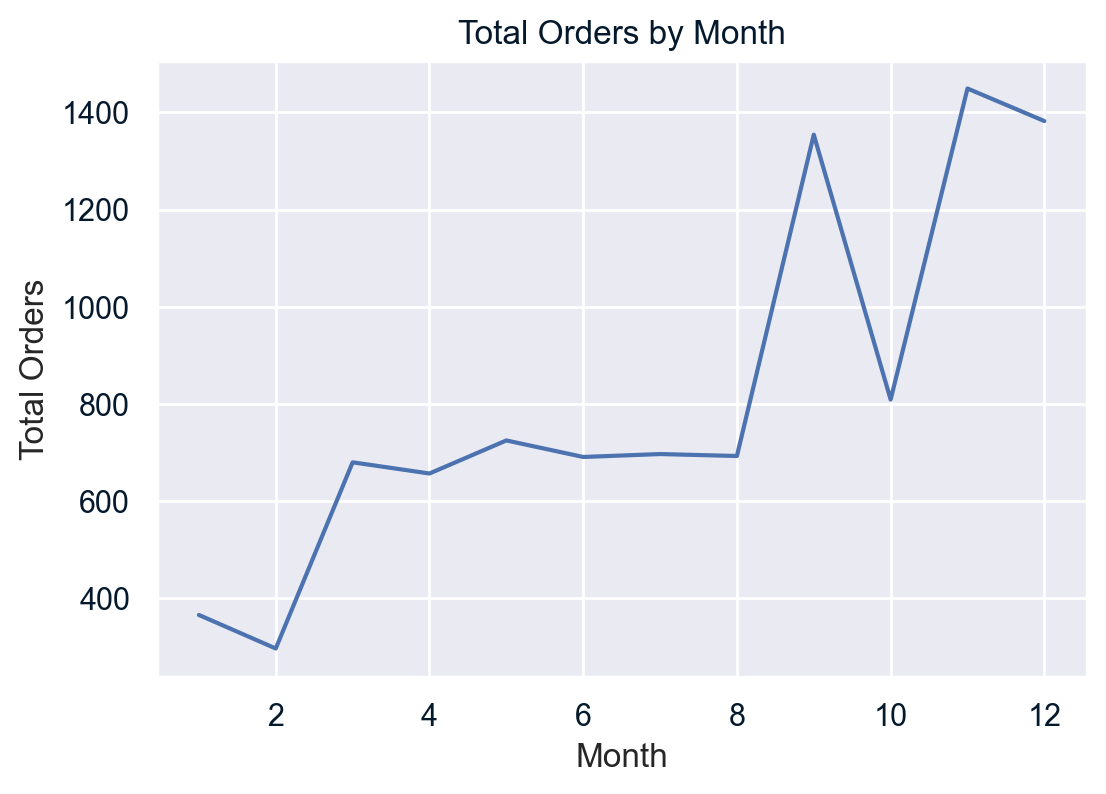

In [8]:
# Adding Month Collumn

sales['Month'] = pd.to_datetime(sales['Order Date']).dt.month

sales_by_month = sales.groupby('Month')['Row ID'].count().reset_index()

plt.figure(figsize=(6,4))

sns.lineplot(data = sales_by_month, x = 'Month', y = 'Row ID')

plt.title('Total Orders by Month')
plt.ylabel('Total Orders')
plt.xlabel('Month')
plt.grid()
plt.show()

Superstore products seem to gain more popularity after the middle of the year, with some sales peaks during promotions like Black Friday and Christmas.

## Company Growth

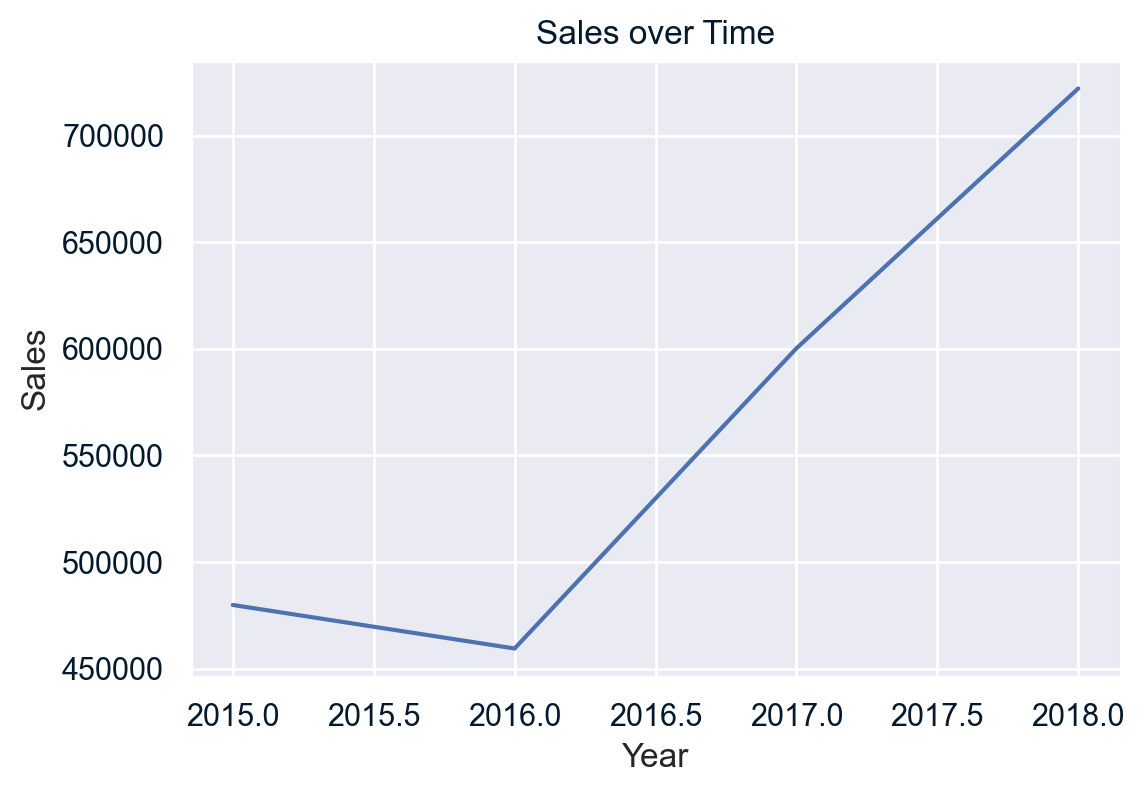

In [9]:
# Sales over time
sales['Year'] = sales['Order Date'].dt.year
sales_by_year = sales.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.lineplot(data = sales_by_year, x = 'Year', y = 'Sales')
plt.title('Sales over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

As the dataset covers, the company shows a steady revenue growth over the years, except for a decline in the first year of operation.

## Insights and Recommendations:

The company has steady growth over the years, but there are still some gaps that can be improved. Based on the presented charts, it would be interesting to work on campaigns for more consistent sales throughout the year, with the possibility of expanding the company’s popularity in states with average sales, focusing on the main products.